<a href="https://colab.research.google.com/github/AlexandreXavierMartins/ProblemaDaMochila/blob/main/SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Média =  16.8


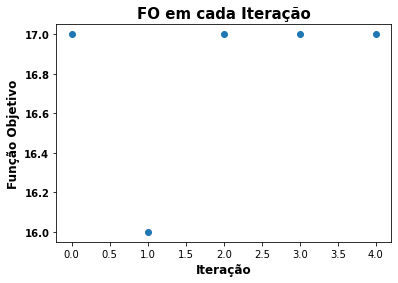

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def gera_sol(s, n, taxa):
  for i in range(n):
    x = np.random.random()
    if x < taxa:
      s[i] = 1
  return s

def calcula_fo(b, p, s, n, cap, pena):
  fo = 0
  pt = 0
  for i in range(n):
    fo = fo + s[i]*b[i]
    pt = pt + s[i]*p[i]
  if pt > cap:
    #print('Solução inviável')
    fo = fo -pena*(pt - cap)
  return fo

#DADOS DO PROBLEMA-------------------#
n = 8 #Quantidade de objetos
beneficio = [4, 3, 2, 6, 2, 3, 5, 4]
peso =      [5, 4, 3, 9, 4, 2, 6, 7]
cap = 20 #Capacidade da mochila
#------------------------------------#
#ESTATÍSTICAS------------------------#
fo_final = []
xlabel = []
media = 0
#------------------------------------#
#PARÂMETROS--------------------------#
penalidade = 2 #Penalidade por solução inviável
alpha = 0.90    #Taxa de Resfriamento (0,1)
SAmax = 2*n
Temperatura = 100
taxa = 0.5
#------------------------------------#
experimentos = 20
for seed in range(experimentos):
  xlabel.append(seed)
  sol_star = n*[0]
  fo_star = -math.inf 
  sol = n*[0] #Vetor para guardar a Solução
  sol = gera_sol(sol, n, taxa)
  fo = calcula_fo(beneficio, peso, sol, n, cap, penalidade)
  for i in range(n):
    sol_star[i] = sol[i]
  fo_star = fo  
  np.random.seed(seed)
  T = Temperatura
  while T > 0.0001:
    for iter in range(SAmax):
      j =  np.random.randint(0, n)
      sol[j] = 1 - sol[j]
      fo_nova = calcula_fo(beneficio, peso, sol, n, cap, penalidade)
      if fo_nova > fo:
        fo = fo_nova
        if fo > fo_star:
          fo_star = fo
          for i in range(n):
            sol_star[i] = sol[i]
      else:
        delta = fo_nova - fo
        x = np.random.random()
        if x < np.exp(delta/T):
          fo = fo_nova
        else:
          sol[j] = 1 - sol[j]
    
    T = T*alpha
    #print(T)
    #print(fo_star)

    
    
  media = media + fo_star
  fo_final.append(fo_star)

media = media/experimentos
#print('Melhor solução = ', fo_star)
#print('Melhor iteração =', best_iter)
print('Média = ', media)
#plt.scatter(xlabel, fo_inicial)
plt.scatter(xlabel, fo_final)
plt.title("FO em cada Iteração", fontsize = 15, fontweight = 'bold')
plt.xlabel("Iteração", fontsize = 12, fontweight = 'bold')
plt.ylabel("Função Objetivo", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight='bold')
plt.show()